In [1]:
import os
import random
import numpy as np
from io import BytesIO

# Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

# Interactive widgets
from ipywidgets import widgets

In [2]:
TRAIN_DIR = r'D:\TensorflowPractice\venv\Datasets\horse-or-human'
VAL_DIR = r'D:\TensorflowPractice\venv\Datasets\validation-horse-or-human'

# Directory with training horse pictures
train_horse_dir = os.path.join(TRAIN_DIR, 'horses')
# Directory with training human pictures
train_human_dir = os.path.join(TRAIN_DIR, 'humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join(VAL_DIR, 'horses')
# Directory with validation human pictures
validation_human_dir = os.path.join(VAL_DIR, 'humans')

In [3]:
print(f"train horse dir names : {os.listdir(train_horse_dir)[:10]}")
print(f"train human dir names : {os.listdir(train_human_dir)[:10]}")
print(f"validation horse dir : {os.listdir(validation_horse_dir)[:10]}")
print(f"validation human dir : {os.listdir(validation_human_dir)[:10]}")

train horse dir names : ['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
train human dir names : ['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
validation horse dir : ['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
validation human dir : ['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [4]:
print(f"total training horse images : {len(os.listdir(train_horse_dir))}")
print(f"total training human images : {len(os.listdir(train_human_dir))}")
print(f"total validation horse images : {len(os.listdir(validation_horse_dir))}")
print(f"total validation human images : {len(os.listdir(validation_human_dir))}")

total training horse images : 500
total training human images : 527
total validation horse images : 128
total validation human images : 128


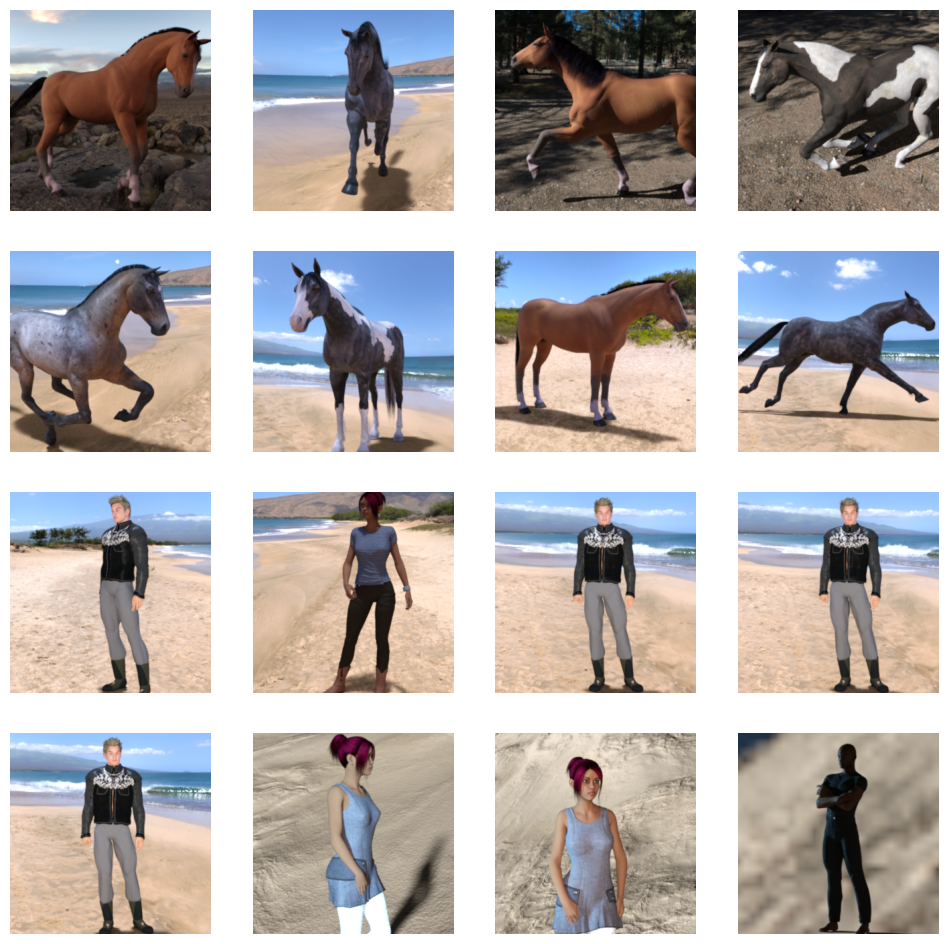

In [5]:
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*3,nrows*3)

next_horse_pics = [os.path.join(train_horse_dir,fname) for fname in random.sample(os.listdir(train_horse_dir), k=8)]
next_human_pics = [os.path.join(train_human_dir,fname) for fname in random.sample(os.listdir(train_human_dir), k=8)]

for i, img_path in enumerate(next_horse_pics + next_human_pics):
    plt.subplot(nrows,ncols,i+1)
    plt.axis('off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size = (300,300),
    batch_size = 32,
    label_mode = 'binary'
)

validation_dataset  = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size = (300,300),
    batch_size = 32,
    label_mode = 'binary'
)

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [7]:
rescale_layer = tf.keras.layers.Rescaling(1./255)

train_dataset_rescaled = train_dataset.map(lambda image, label : (rescale_layer(image),label))
validation_dataset_rescaled = validation_dataset.map(lambda image, label: (rescale_layer(image),label))

In [8]:
SHUFFLE_BUFFER_SIZE = 1000

train_dataset_final = (train_dataset_rescaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(tf.data.AUTOTUNE))

validation_dataset_final = (validation_dataset_rescaled
                            .cache()
                            .shuffle(SHUFFLE_BUFFER_SIZE)
                            .prefetch(tf.data.AUTOTUNE))

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (300,300,3)),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,346,657 (12.77 MB)

 Trainable params: 3,346,657 (12.77 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [12]:
history = model.fit(train_dataset_final, epochs=15, validation_data= validation_dataset_final, verbose=2)

Epoch 1/15
33/33 - 10s - 300ms/step - accuracy: 0.6388 - loss: 0.7419 - val_accuracy: 0.5000 - val_loss: 1.1103
Epoch 2/15
33/33 - 7s - 217ms/step - accuracy: 0.8491 - loss: 0.3680 - val_accuracy: 0.6719 - val_loss: 2.3494
Epoch 3/15
33/33 - 8s - 233ms/step - accuracy: 0.9367 - loss: 0.1810 - val_accuracy: 0.8008 - val_loss: 1.0836
Epoch 4/15
33/33 - 7s - 216ms/step - accuracy: 0.9620 - loss: 0.1048 - val_accuracy: 0.8906 - val_loss: 0.5192
Epoch 5/15
33/33 - 7s - 214ms/step - accuracy: 0.9503 - loss: 0.1334 - val_accuracy: 0.7461 - val_loss: 0.6587
Epoch 6/15
33/33 - 7s - 209ms/step - accuracy: 0.9737 - loss: 0.1051 - val_accuracy: 0.8672 - val_loss: 0.6271
Epoch 7/15
33/33 - 7s - 204ms/step - accuracy: 0.9825 - loss: 0.0490 - val_accuracy: 0.6328 - val_loss: 1.9239
Epoch 8/15
33/33 - 7s - 227ms/step - accuracy: 0.9912 - loss: 0.0196 - val_accuracy: 0.7383 - val_loss: 4.4052
Epoch 9/15
33/33 - 7s - 205ms/step - accuracy: 0.9679 - loss: 0.1150 - val_accuracy: 0.7500 - val_loss: 2.0400


[]

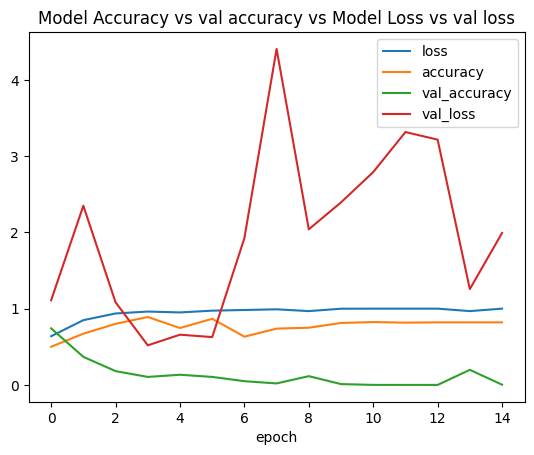

In [15]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model Accuracy vs val accuracy vs Model Loss vs val loss')
pyplot.xlabel('epoch')
pyplot.legend(['loss','accuracy','val_accuracy','val_loss'],loc='upper right')
pyplot.plot()

In [16]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(300, 300))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a human")
        else:
            print(filename + " is a horse")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)

# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()

d:\TensorflowPractice\venv\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 300, 300, 3))
  warnings.warn(msg)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9288\3940819393.py:41: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9288\3940819393.py:44: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


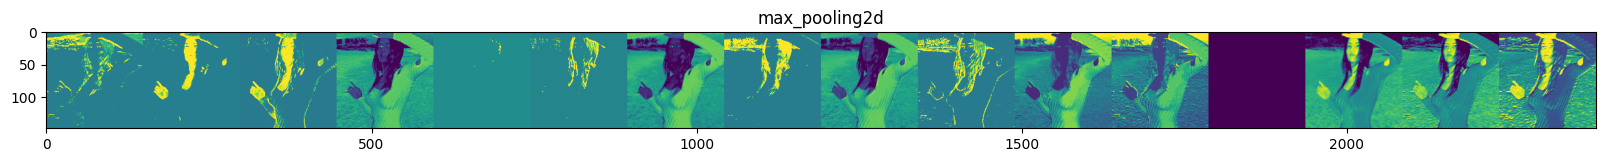

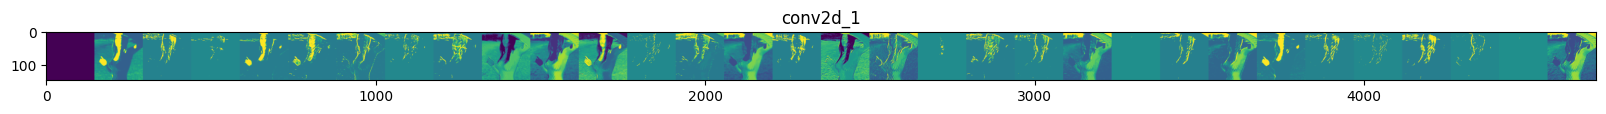

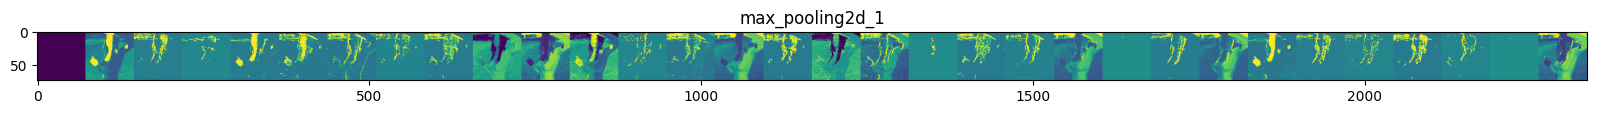

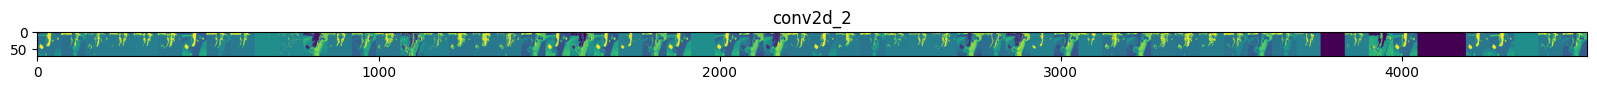

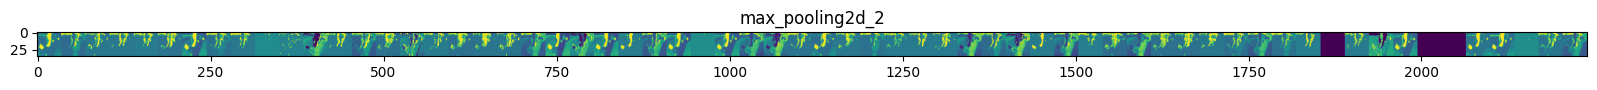

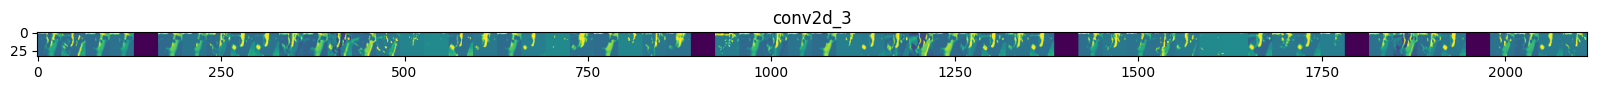

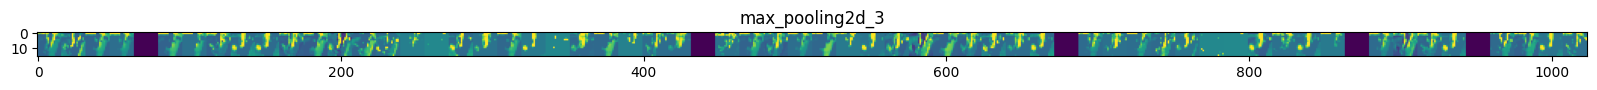

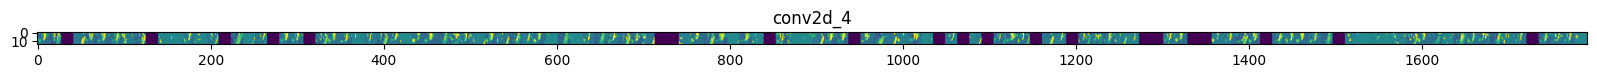

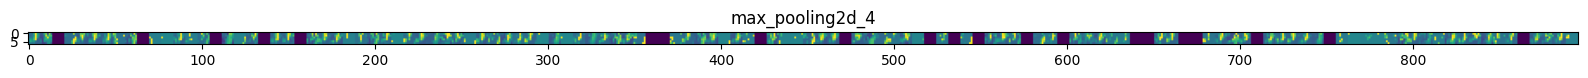

In [17]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in os.listdir(train_horse_dir)]
human_img_files = [os.path.join(train_human_dir, f) for f in os.listdir(train_human_dir)]
img_path = random.choice(horse_img_files + human_img_files)

img = tf.keras.utils.load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = tf.keras.utils.img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x = rescale_layer(x)

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x, verbose=False)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x

        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
from IPython import get_ipython

k = get_ipython().kernel

k.do_shutdown(restart=False)

{'status': 'ok', 'restart': False}

: 